<a id='top'></a>
## Can Amazon Reviews Help Businesses Learn their Best Customers? 

#### Contributors: Muoyo Okome

<p><img src='https://github.com/muoyo/amazon-reviews/blob/master/images/wordcloud.png?raw=true' align='left'>

<a id='toc'></a>
### Table of Contents
1. [Problem Statement](#problemstatement)
2. [Data Sources](#datasources)
3. [Data Cleaning](#datacleaning)
4. [Classification Analysis](#classification)  
    - [Logistic Regression](#logisticregression)
    - [K Nearest Neighbors](#kneighbors)
    - [Decision Trees](#decisiontrees)
    - [Bagged Trees](#baggedtrees)
    - [Random Forest](#randomforest)
    - [Adaboost](#adaboost)
    - [Gradient Boost](#gradientboost)
    - [Improved Results through Count Vectorization](#countvectorization)
5. [Vizualizations](#visualizations)
6. [Recommendations & Next Steps](#recommendations)

In [2]:
# Import necessary libraries
import warnings
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

<a id='problemstatement'></a>
### Problem Statement

**Can Amazon Reviews Help Businesses Learn their Best Customers?**

The key question we look to answer is whether knowing the text of an Amazon Customer Review can help us predict the star rating of that review.

Our goal is to eventually improve our process to a level where it can be deployed on customer conversations anywhere to help businesses identify customers most likely to love or hate their products based on the things they are saying.

[Back to Top ↑](#top)

<a id='datasources'></a>
### Data Sources

#### **[AWS Open Data: Amazon Customer Reviews Dataset](https://registry.opendata.aws/amazon:reviews/)**

- Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazon’s iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. Over 130+ million customer reviews are available to researchers as part of this dataset.

- A collection of reviews written in the Amazon.com marketplace and associated metadata from 1995 until 2015. This is intended to facilitate study into the properties (and the evolution) of customer reviews potentially including how people evaluate and express their experiences with respect to products at scale. (130M+ customer reviews) 

<br> 

[Back to Top ↑](#top)

In [112]:
# Import python files we've created to help
%run ../python_files/nlp
%run ../python_files/data_cleaning
%run ../python_files/classification
%run ../python_files/visualizations

In [99]:
# Read in original data
df_full = pd.read_csv('https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz', sep='\t', error_bad_lines=False, warn_bad_lines=False)

In [ ]:
cat_list = [
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Wireless_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_DVD_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Toys_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Tools_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Sports_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Software_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Shoes_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Pet_Products_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_PC_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Outdoors_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Office_Products_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Musical_Instruments_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Music_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Major_Appliances_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Luggage_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Lawn_and_Garden_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Kitchen_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Jewelry_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_Improvement_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_Entertainment_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Health_Personal_Care_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Grocery_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Furniture_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Games_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Download_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Ebook_Purchase_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Camera_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_02.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_01.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Beauty_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Baby_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Automotive_v1_00.tsv.gz',
    'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Apparel_v1_00.tsv.gz'
]

dfs = {}

for cat_link in cat_list:
    dfs[cat_link] = pd.read_csv(cat_link, sep='\t', error_bad_lines=False, warn_bad_lines=True)
    print(cat_link, dfs[cat_link].shape)
    

b'Skipping line 51163: expected 15 fields, saw 22\n'
b'Skipping line 77018: expected 15 fields, saw 22\nSkipping line 97528: expected 15 fields, saw 22\n'
b'Skipping line 145503: expected 15 fields, saw 22\nSkipping line 172172: expected 15 fields, saw 22\nSkipping line 185136: expected 15 fields, saw 22\nSkipping line 187592: expected 15 fields, saw 22\n'
b'Skipping line 222158: expected 15 fields, saw 22\nSkipping line 232048: expected 15 fields, saw 22\nSkipping line 232320: expected 15 fields, saw 22\nSkipping line 234653: expected 15 fields, saw 22\nSkipping line 257210: expected 15 fields, saw 22\nSkipping line 261368: expected 15 fields, saw 22\n'
b'Skipping line 262843: expected 15 fields, saw 22\nSkipping line 274082: expected 15 fields, saw 22\nSkipping line 276172: expected 15 fields, saw 22\nSkipping line 327076: expected 15 fields, saw 22\n'
b'Skipping line 328675: expected 15 fields, saw 22\nSkipping line 366744: expected 15 fields, saw 22\nSkipping line 380897: expected 

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Wireless_v1_00.tsv.gz (8991589, 15)


b'Skipping line 8704: expected 15 fields, saw 22\nSkipping line 16933: expected 15 fields, saw 22\nSkipping line 23726: expected 15 fields, saw 22\n'
b'Skipping line 85637: expected 15 fields, saw 22\n'
b'Skipping line 132136: expected 15 fields, saw 22\nSkipping line 158070: expected 15 fields, saw 22\nSkipping line 166007: expected 15 fields, saw 22\nSkipping line 171877: expected 15 fields, saw 22\nSkipping line 177756: expected 15 fields, saw 22\nSkipping line 181773: expected 15 fields, saw 22\nSkipping line 191085: expected 15 fields, saw 22\nSkipping line 196273: expected 15 fields, saw 22\nSkipping line 196331: expected 15 fields, saw 22\n'
b'Skipping line 197000: expected 15 fields, saw 22\nSkipping line 197011: expected 15 fields, saw 22\nSkipping line 197432: expected 15 fields, saw 22\nSkipping line 208016: expected 15 fields, saw 22\nSkipping line 214110: expected 15 fields, saw 22\nSkipping line 244328: expected 15 fields, saw 22\nSkipping line 248519: expected 15 fields,

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz (960204, 15)


b'Skipping line 20630: expected 15 fields, saw 22\nSkipping line 28172: expected 15 fields, saw 22\nSkipping line 54791: expected 15 fields, saw 22\n'
b'Skipping line 75419: expected 15 fields, saw 22\nSkipping line 104832: expected 15 fields, saw 22\n'
b'Skipping line 138464: expected 15 fields, saw 22\nSkipping line 194849: expected 15 fields, saw 22\n'
b'Skipping line 201568: expected 15 fields, saw 22\nSkipping line 242567: expected 15 fields, saw 22\n'
b'Skipping line 493585: expected 15 fields, saw 22\nSkipping line 502478: expected 15 fields, saw 22\n'
b'Skipping line 660750: expected 15 fields, saw 22\n'


https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz (1780268, 15)


b'Skipping line 1890: expected 15 fields, saw 22\nSkipping line 6666: expected 15 fields, saw 22\n'
b'Skipping line 111408: expected 15 fields, saw 22\n'
b'Skipping line 170181: expected 15 fields, saw 22\nSkipping line 170231: expected 15 fields, saw 22\n'
b'Skipping line 256196: expected 15 fields, saw 22\n'
b'Skipping line 295037: expected 15 fields, saw 22\n'
b'Skipping line 548974: expected 15 fields, saw 22\nSkipping line 551265: expected 15 fields, saw 22\nSkipping line 551973: expected 15 fields, saw 22\n'
b'Skipping line 619923: expected 15 fields, saw 22\n'
b'Skipping line 763610: expected 15 fields, saw 22\n'
b'Skipping line 798928: expected 15 fields, saw 22\n'
b'Skipping line 859446: expected 15 fields, saw 22\n'
b'Skipping line 972328: expected 15 fields, saw 22\n'
b'Skipping line 988275: expected 15 fields, saw 22\n'
b'Skipping line 1133741: expected 15 fields, saw 22\n'
b'Skipping line 1278960: expected 15 fields, saw 22\n'
b'Skipping line 1317934: expected 15 fields, s

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_DVD_v1_00.tsv.gz (5049291, 15)


b'Skipping line 88: expected 15 fields, saw 22\n'


https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_v1_00.tsv.gz (380551, 15)


b'Skipping line 7003: expected 15 fields, saw 22\nSkipping line 22430: expected 15 fields, saw 22\nSkipping line 25418: expected 15 fields, saw 22\nSkipping line 43786: expected 15 fields, saw 22\nSkipping line 46566: expected 15 fields, saw 22\nSkipping line 63511: expected 15 fields, saw 22\n'
b'Skipping line 69097: expected 15 fields, saw 22\nSkipping line 74615: expected 15 fields, saw 22\nSkipping line 79354: expected 15 fields, saw 22\nSkipping line 81566: expected 15 fields, saw 22\nSkipping line 89464: expected 15 fields, saw 22\nSkipping line 93104: expected 15 fields, saw 22\nSkipping line 95570: expected 15 fields, saw 22\nSkipping line 96587: expected 15 fields, saw 22\nSkipping line 102117: expected 15 fields, saw 22\nSkipping line 121288: expected 15 fields, saw 22\n'
b'Skipping line 144424: expected 15 fields, saw 22\nSkipping line 168191: expected 15 fields, saw 22\nSkipping line 173291: expected 15 fields, saw 22\n'
b'Skipping line 199932: expected 15 fields, saw 22\nS

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Toys_v1_00.tsv.gz (4859607, 15)


b'Skipping line 17990: expected 15 fields, saw 22\nSkipping line 33182: expected 15 fields, saw 22\nSkipping line 35417: expected 15 fields, saw 22\nSkipping line 52596: expected 15 fields, saw 22\n'
b'Skipping line 88313: expected 15 fields, saw 22\n'
b'Skipping line 132531: expected 15 fields, saw 22\nSkipping line 141602: expected 15 fields, saw 22\nSkipping line 146295: expected 15 fields, saw 22\nSkipping line 147512: expected 15 fields, saw 22\nSkipping line 150708: expected 15 fields, saw 22\nSkipping line 154197: expected 15 fields, saw 22\nSkipping line 192352: expected 15 fields, saw 22\nSkipping line 193908: expected 15 fields, saw 22\n'
b'Skipping line 207944: expected 15 fields, saw 22\nSkipping line 208350: expected 15 fields, saw 22\nSkipping line 208759: expected 15 fields, saw 22\nSkipping line 209151: expected 15 fields, saw 22\n'
b'Skipping line 273516: expected 15 fields, saw 22\nSkipping line 276042: expected 15 fields, saw 22\nSkipping line 289485: expected 15 fie

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Tools_v1_00.tsv.gz (1740041, 15)


b'Skipping line 7549: expected 15 fields, saw 22\nSkipping line 27856: expected 15 fields, saw 22\nSkipping line 53399: expected 15 fields, saw 22\n'
b'Skipping line 76073: expected 15 fields, saw 22\nSkipping line 89612: expected 15 fields, saw 22\nSkipping line 93502: expected 15 fields, saw 22\nSkipping line 96533: expected 15 fields, saw 22\nSkipping line 107777: expected 15 fields, saw 22\nSkipping line 114290: expected 15 fields, saw 22\nSkipping line 118937: expected 15 fields, saw 22\n'
b'Skipping line 175061: expected 15 fields, saw 22\nSkipping line 185159: expected 15 fields, saw 22\nSkipping line 191448: expected 15 fields, saw 22\n'
b'Skipping line 217523: expected 15 fields, saw 22\nSkipping line 217618: expected 15 fields, saw 22\nSkipping line 238480: expected 15 fields, saw 22\nSkipping line 242797: expected 15 fields, saw 22\nSkipping line 258855: expected 15 fields, saw 22\n'
b'Skipping line 274223: expected 15 fields, saw 22\nSkipping line 284977: expected 15 fields

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Sports_v1_00.tsv.gz (4833094, 15)


b'Skipping line 8021: expected 15 fields, saw 22\nSkipping line 34886: expected 15 fields, saw 22\nSkipping line 49286: expected 15 fields, saw 22\n'


https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Software_v1_00.tsv.gz (341249, 15)


b'Skipping line 54101: expected 15 fields, saw 22\nSkipping line 55857: expected 15 fields, saw 22\nSkipping line 60448: expected 15 fields, saw 22\n'
b'Skipping line 76918: expected 15 fields, saw 22\nSkipping line 87925: expected 15 fields, saw 22\nSkipping line 88500: expected 15 fields, saw 22\nSkipping line 114276: expected 15 fields, saw 22\nSkipping line 128751: expected 15 fields, saw 22\n'
b'Skipping line 136095: expected 15 fields, saw 22\nSkipping line 140007: expected 15 fields, saw 22\nSkipping line 177148: expected 15 fields, saw 22\nSkipping line 180087: expected 15 fields, saw 22\nSkipping line 183010: expected 15 fields, saw 22\nSkipping line 183949: expected 15 fields, saw 22\nSkipping line 192879: expected 15 fields, saw 22\n'
b'Skipping line 223261: expected 15 fields, saw 22\nSkipping line 240588: expected 15 fields, saw 22\nSkipping line 247955: expected 15 fields, saw 22\nSkipping line 249336: expected 15 fields, saw 22\nSkipping line 259363: expected 15 fields, 

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Shoes_v1_00.tsv.gz (4358820, 15)


b'Skipping line 21404: expected 15 fields, saw 22\nSkipping line 31839: expected 15 fields, saw 22\nSkipping line 37779: expected 15 fields, saw 22\nSkipping line 38344: expected 15 fields, saw 22\nSkipping line 61449: expected 15 fields, saw 22\n'
b'Skipping line 80975: expected 15 fields, saw 22\nSkipping line 85603: expected 15 fields, saw 22\nSkipping line 95950: expected 15 fields, saw 22\nSkipping line 105132: expected 15 fields, saw 22\nSkipping line 115378: expected 15 fields, saw 22\n'
b'Skipping line 152632: expected 15 fields, saw 22\nSkipping line 159310: expected 15 fields, saw 22\nSkipping line 162724: expected 15 fields, saw 22\nSkipping line 168588: expected 15 fields, saw 22\nSkipping line 170412: expected 15 fields, saw 22\nSkipping line 187169: expected 15 fields, saw 22\n'
b'Skipping line 205461: expected 15 fields, saw 22\nSkipping line 210928: expected 15 fields, saw 22\nSkipping line 213691: expected 15 fields, saw 22\nSkipping line 228697: expected 15 fields, sa

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Pet_Products_v1_00.tsv.gz (2639853, 15)


b'Skipping line 1598: expected 15 fields, saw 22\nSkipping line 25768: expected 15 fields, saw 22\n'


https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz (85924, 15)


b'Skipping line 42306: expected 15 fields, saw 22\nSkipping line 61136: expected 15 fields, saw 22\nSkipping line 64592: expected 15 fields, saw 22\n'
b'Skipping line 73268: expected 15 fields, saw 22\nSkipping line 80720: expected 15 fields, saw 22\nSkipping line 120624: expected 15 fields, saw 22\nSkipping line 121776: expected 15 fields, saw 22\n'
b'Skipping line 154351: expected 15 fields, saw 22\nSkipping line 155937: expected 15 fields, saw 22\n'
b'Skipping line 203615: expected 15 fields, saw 22\nSkipping line 208061: expected 15 fields, saw 22\nSkipping line 212638: expected 15 fields, saw 22\nSkipping line 219390: expected 15 fields, saw 22\nSkipping line 235195: expected 15 fields, saw 22\n'
b'Skipping line 284570: expected 15 fields, saw 22\nSkipping line 297246: expected 15 fields, saw 22\nSkipping line 326901: expected 15 fields, saw 22\n'
b'Skipping line 344609: expected 15 fields, saw 22\nSkipping line 347706: expected 15 fields, saw 22\nSkipping line 348978: expected 15

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_PC_v1_00.tsv.gz (6906869, 15)


b'Skipping line 3121: expected 15 fields, saw 22\nSkipping line 23098: expected 15 fields, saw 22\nSkipping line 44261: expected 15 fields, saw 22\nSkipping line 46415: expected 15 fields, saw 22\nSkipping line 49691: expected 15 fields, saw 22\nSkipping line 53219: expected 15 fields, saw 22\n'
b'Skipping line 76042: expected 15 fields, saw 22\nSkipping line 94032: expected 15 fields, saw 22\nSkipping line 114699: expected 15 fields, saw 22\nSkipping line 125796: expected 15 fields, saw 22\n'
b'Skipping line 157739: expected 15 fields, saw 22\nSkipping line 175898: expected 15 fields, saw 22\nSkipping line 177167: expected 15 fields, saw 22\nSkipping line 192248: expected 15 fields, saw 22\n'
b'Skipping line 198940: expected 15 fields, saw 22\nSkipping line 216336: expected 15 fields, saw 22\nSkipping line 222360: expected 15 fields, saw 22\nSkipping line 230919: expected 15 fields, saw 22\nSkipping line 234929: expected 15 fields, saw 22\nSkipping line 254683: expected 15 fields, saw

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Outdoors_v1_00.tsv.gz (2299811, 15)


b'Skipping line 20773: expected 15 fields, saw 22\nSkipping line 39834: expected 15 fields, saw 22\nSkipping line 52957: expected 15 fields, saw 22\nSkipping line 54540: expected 15 fields, saw 22\n'
b'Skipping line 80276: expected 15 fields, saw 22\nSkipping line 96168: expected 15 fields, saw 22\nSkipping line 96866: expected 15 fields, saw 22\nSkipping line 98175: expected 15 fields, saw 22\nSkipping line 112539: expected 15 fields, saw 22\nSkipping line 119377: expected 15 fields, saw 22\nSkipping line 120065: expected 15 fields, saw 22\nSkipping line 124703: expected 15 fields, saw 22\n'
b'Skipping line 134024: expected 15 fields, saw 22\nSkipping line 153938: expected 15 fields, saw 22\nSkipping line 156225: expected 15 fields, saw 22\nSkipping line 168603: expected 15 fields, saw 22\nSkipping line 187002: expected 15 fields, saw 22\n'
b'Skipping line 200397: expected 15 fields, saw 22\nSkipping line 203809: expected 15 fields, saw 22\nSkipping line 207680: expected 15 fields, sa

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Office_Products_v1_00.tsv.gz (2640254, 15)


b'Skipping line 5782: expected 15 fields, saw 22\nSkipping line 31979: expected 15 fields, saw 22\nSkipping line 32408: expected 15 fields, saw 22\nSkipping line 45709: expected 15 fields, saw 22\nSkipping line 64585: expected 15 fields, saw 22\n'
b'Skipping line 115742: expected 15 fields, saw 22\nSkipping line 125537: expected 15 fields, saw 22\nSkipping line 127580: expected 15 fields, saw 22\nSkipping line 128696: expected 15 fields, saw 22\n'
b'Skipping line 143851: expected 15 fields, saw 22\nSkipping line 147069: expected 15 fields, saw 22\nSkipping line 149233: expected 15 fields, saw 22\nSkipping line 167536: expected 15 fields, saw 22\nSkipping line 168535: expected 15 fields, saw 22\nSkipping line 171659: expected 15 fields, saw 22\nSkipping line 184533: expected 15 fields, saw 22\nSkipping line 184624: expected 15 fields, saw 22\nSkipping line 184908: expected 15 fields, saw 22\n'
b'Skipping line 219150: expected 15 fields, saw 22\nSkipping line 223178: expected 15 fields, 

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Musical_Instruments_v1_00.tsv.gz (904004, 15)


b'Skipping line 1806: expected 15 fields, saw 22\n'
b'Skipping line 122830: expected 15 fields, saw 22\nSkipping line 128573: expected 15 fields, saw 22\n'
b'Skipping line 132725: expected 15 fields, saw 22\nSkipping line 139782: expected 15 fields, saw 22\nSkipping line 141362: expected 15 fields, saw 22\nSkipping line 151132: expected 15 fields, saw 22\nSkipping line 168466: expected 15 fields, saw 22\nSkipping line 171654: expected 15 fields, saw 22\nSkipping line 178479: expected 15 fields, saw 22\nSkipping line 179537: expected 15 fields, saw 22\nSkipping line 190573: expected 15 fields, saw 22\n'
b'Skipping line 205670: expected 15 fields, saw 22\nSkipping line 229584: expected 15 fields, saw 22\nSkipping line 241528: expected 15 fields, saw 22\n'
b'Skipping line 295811: expected 15 fields, saw 22\nSkipping line 297963: expected 15 fields, saw 22\nSkipping line 303035: expected 15 fields, saw 22\nSkipping line 326369: expected 15 fields, saw 22\n'
b'Skipping line 331142: expected

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Music_v1_00.tsv.gz (4740849, 15)


b'Skipping line 35246: expected 15 fields, saw 22\n'
b'Skipping line 87073: expected 15 fields, saw 22\n'


https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz (104852, 15)


b'Skipping line 110774: expected 15 fields, saw 22\n'
b'Skipping line 1973406: expected 15 fields, saw 22\nSkipping line 2025322: expected 15 fields, saw 22\n'


https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz (5008069, 15)


b'Skipping line 5583: expected 15 fields, saw 22\nSkipping line 22814: expected 15 fields, saw 22\nSkipping line 22883: expected 15 fields, saw 22\nSkipping line 29872: expected 15 fields, saw 22\nSkipping line 37242: expected 15 fields, saw 22\nSkipping line 59693: expected 15 fields, saw 22\n'


https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Major_Appliances_v1_00.tsv.gz (96834, 15)


b'Skipping line 21775: expected 15 fields, saw 22\nSkipping line 35823: expected 15 fields, saw 22\nSkipping line 46386: expected 15 fields, saw 22\n'
b'Skipping line 75998: expected 15 fields, saw 22\nSkipping line 82507: expected 15 fields, saw 22\nSkipping line 98223: expected 15 fields, saw 22\nSkipping line 129152: expected 15 fields, saw 22\nSkipping line 130115: expected 15 fields, saw 22\n'
b'Skipping line 131270: expected 15 fields, saw 22\nSkipping line 151687: expected 15 fields, saw 22\n'
b'Skipping line 196882: expected 15 fields, saw 22\nSkipping line 213341: expected 15 fields, saw 22\nSkipping line 233947: expected 15 fields, saw 22\n'


https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Luggage_v1_00.tsv.gz (348461, 15)


b'Skipping line 7907: expected 15 fields, saw 22\nSkipping line 31230: expected 15 fields, saw 22\nSkipping line 37569: expected 15 fields, saw 22\nSkipping line 39985: expected 15 fields, saw 22\nSkipping line 40172: expected 15 fields, saw 22\nSkipping line 41537: expected 15 fields, saw 22\n'
b'Skipping line 80279: expected 15 fields, saw 22\nSkipping line 87699: expected 15 fields, saw 22\nSkipping line 89086: expected 15 fields, saw 22\nSkipping line 100737: expected 15 fields, saw 22\n'
b'Skipping line 132112: expected 15 fields, saw 22\nSkipping line 141267: expected 15 fields, saw 22\nSkipping line 141268: expected 15 fields, saw 22\n'
b'Skipping line 209589: expected 15 fields, saw 22\nSkipping line 218992: expected 15 fields, saw 22\nSkipping line 224068: expected 15 fields, saw 22\nSkipping line 234468: expected 15 fields, saw 22\nSkipping line 236262: expected 15 fields, saw 22\nSkipping line 243422: expected 15 fields, saw 22\n'
b'Skipping line 294204: expected 15 fields, 

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Lawn_and_Garden_v1_00.tsv.gz (2555288, 15)


In [ ]:
for cat_link in dfs:
    print(cat_link)
    dfs[cat_link] = dfs[cat_link][dfs[cat_link].star_rating != 3]
    dfs[cat_link]['review_class'] = ((dfs[cat_link]['star_rating'] == 4) | (dfs[cat_link]['star_rating'] == 5)).astype(int)
    dfs[cat_link] = clean_data(dfs[cat_link])
    dfs[cat_link] = append_sentiment_scores(dfs[cat_link])
    print(dfs[cat_link].head())

<a id='datacleaning'></a>
### Data Cleaning

In preparation for our analysis, in addition to dealing with missing values and limiting our scope to the columns of interest, we also used [VADER Sentiment Analysis](https://github.com/cjhutto/vaderSentiment) (Valence Aware Dictionary and sEntiment Reasoner) to give us positive, negative, neutral, and compound sentiment scores for each review in our dataset.

To make the project more modular and easier to follow & build upon, we created separate .py files to handle the heavy lifting for tasks such as data extraction & cleaning, visualizations, and natural language processing.

We chose to focus on the Watches category (~960,000 customer reviews) for this analysis, though with sufficient time, the process can be generalized to all 130 million rows of the dataset.

In [5]:
# Clean data & load into final dataframe

In [6]:
df_full = df_full[df_full.star_rating != 3]
df_full['review_class'] = ((df_full['star_rating'] == 4) | (df_full['star_rating'] == 5)).astype(int)

In [143]:
df = clean_data(df_full)

In [144]:
# df_full.customer_id.value_counts()

In [145]:
# df_full.loc[df_full.customer_id == 40765068]

In [146]:
# df_full.loc[df_full.customer_id == 42418272]

In [147]:
df = append_sentiment_scores(df)

In [148]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,verified_purchase,review_headline,review_body,review_date,review_class,review_fulltext,neg,neu,pos,compound
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,...,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31,1,Five Stars. Absolutely love this watch! Get co...,0.000,0.616,0.384,0.8169
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,...,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31,1,I love thiswatch it keeps time wonderfully. I ...,0.000,0.357,0.643,0.9531
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,...,Y,Two Stars,Scratches,2015-08-31,0,Two Stars. Scratches,0.000,1.000,0.000,0.0000
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,...,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31,1,"Five Stars. It works well on me. However, I fo...",0.000,0.890,0.110,0.2732
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,...,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31,1,"Beautiful face, but cheap sounding links. Beau...",0.024,0.715,0.261,0.9886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960199,US,39508379,REH8UQZAXQS40,B00005OT9I,2153632,Xhilaration&#174; Silver Dial Bangle Watch,Watches,2,17,17,...,N,Great prize - but size??,It's a great watch - but you don't have a chan...,2001-12-13,0,Great prize - but size??. It's a great watch -...,0.152,0.508,0.340,0.7867
960200,US,44704251,RJ14QPZEOI9P8,B00005QEM6,903687397,Armitron Men's Titanium 3 Eye Sport Analog Chr...,Watches,5,9,10,...,N,A very classy watch!,"Well worth the price. This is a light weight, ...",2001-11-08,1,A very classy watch!. Well worth the price. Th...,0.000,0.618,0.382,0.9766
960201,US,40571775,R2B1G5650WWFCE,B00005QEME,252821780,Men's Timex Internet Messenger Sport Watch,Watches,5,3,16,...,N,This is a great watch,"Dear Targeteers,<BR>This watch is exelent. it ...",2001-11-06,1,"This is a great watch. Dear Targeteers,<BR>Thi...",0.000,0.746,0.254,0.8979
960202,US,44474855,R2MMGPUWXXOFI2,B00004YK0H,118389241,Energizer 393 Button Cell Battery,Watches,4,0,0,...,N,Now watt a minute here.,"In the old days, the common hearing battery in...",2001-04-05,1,"Now watt a minute here.. In the old days, the ...",0.020,0.905,0.075,0.6402


In [149]:
import pickle

pickle.dump( df, open( "../models/save.df", "wb" ) )



[Back to Top ↑](#top)

<a id='classification'></a>
### Classification Analysis

With the help of the scikit-learn package, our next step was to run a series of classification models, each time with the goal of using insight gained from the review text, to predict the number of stars in the review's star rating.

- **Dependent variable:** **star_rating:** The 1-5 star rating of the review. <p>

- **Independendent variables:**
    - **review_fulltext** serves as the underlying data for all of our independent variables.<br>
    It is made up of the **review_title** and **review_body** appended together.
    
    From the **review_fulltext** we calculated 4 sentiment scores which we used as our variables.
        - **neg:** Review's 'negative' rating via VADER Sentiment Analysis.
        - **neu:** Review's 'neutral' rating via VADER Sentiment Analysis.
        - **pos:** Review's 'positive' rating via VADER Sentiment Analysis.
        - **compound:** Review's 'compound' rating via VADER Sentiment Analysis.

To guard against data leakage, we split our dataset into training data and test data.

In [150]:
df.shape

(881088, 21)

In [151]:
X_train, X_test, y_train, y_test = get_train_test_split(df, test_size=.25)

Looking at our data, it's clear that the classes present are not naturally balanced, which one might expect.

In [152]:
y_train.value_counts()

1    557540
0    103276
Name: review_class, dtype: int64

In [153]:
def wordcount(sentence):
    return len(sentence.split())

In [154]:
X_train.review_fulltext.map(wordcount).mean()

52.29799671920777

We leveraged SMOTE to deal with this unbalanced class issue.

In [155]:
# smote = SMOTE()

X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# X_train_resampled, y_train_resampled = smote.fit_sample(X_train_numeric, y_train) 

In [156]:
# from imblearn.under_sampling import ClusterCentroids

# cc = ClusterCentroids()
# X_train_resampled, y_train_resampled = cc.fit_resample(X_train_numeric, y_train)

In [157]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_numeric, y_train)

In [158]:
# X_train_resampled = X_train_numeric
# y_train_resampled = y_train

In [159]:
y_train_resampled.value_counts()

1    103276
0    103276
Name: review_class, dtype: int64

With newly balanced classes for our analysis, we ran a series of classification models against our data with varying results. For each model, we display a classification report and confusion matrix for training and test sets to quickly understand the 

Our Decision Trees and K Nearest Neighbors were the models best at explaining our training data. However, performance against our test data showed that in most cases our models still had significant room for improvement, with overfitting often being the culprit (for some random samples overfitting was much less of an issue, but it did often occur). Going forward this is something we will look to improve our models by addressing this problem.



[Back to Top ↑](#top)

<a id='logisticregression'></a>
### Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.83      0.84    103276
           1       0.83      0.85      0.84    103276

    accuracy                           0.84    206552
   macro avg       0.84      0.84      0.84    206552
weighted avg       0.84      0.84      0.84    206552



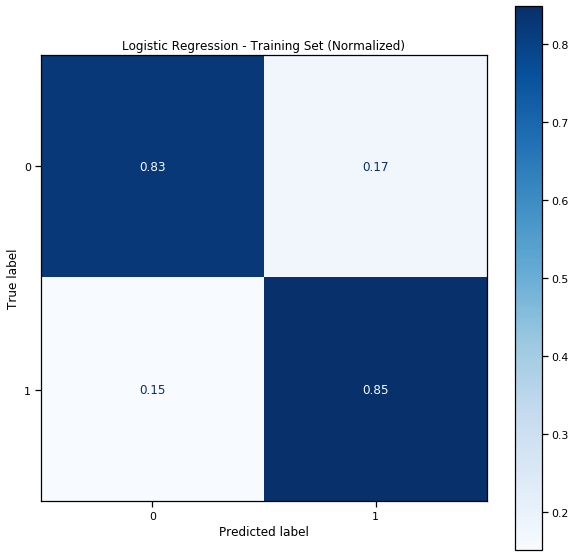

In [178]:
clf_lr = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear', penalty='l2')
clf_lr.fit(X_train_resampled, y_train_resampled)

y_hat_lr_train = clf_lr.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_lr_train))
show_confusion_matrix(clf_lr, X_train_resampled, y_train_resampled, title='Logistic Regression - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.50      0.83      0.63     33858
           1       0.96      0.85      0.90    186414

    accuracy                           0.85    220272
   macro avg       0.73      0.84      0.76    220272
weighted avg       0.89      0.85      0.86    220272



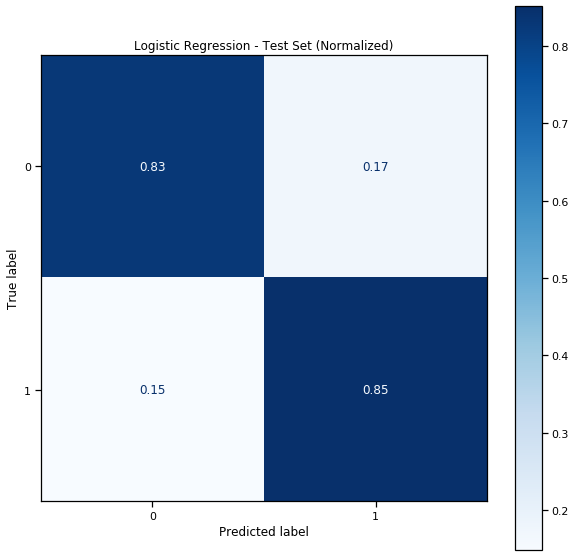

In [179]:
y_hat_lr_test = clf_lr.predict(X_test_numeric)
print(classification_report(y_test, y_hat_lr_test))
show_confusion_matrix(clf_lr, X_test_numeric, y_test, title='Logistic Regression - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='naivebayes'></a>
### Naive Bayes

              precision    recall  f1-score   support

           0       0.86      0.79      0.82    103276
           1       0.81      0.87      0.84    103276

    accuracy                           0.83    206552
   macro avg       0.83      0.83      0.83    206552
weighted avg       0.83      0.83      0.83    206552



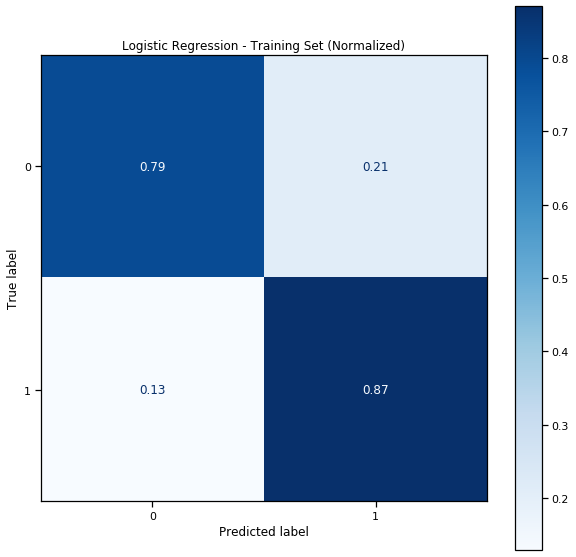

In [180]:
clf_nb = GaussianNB()
clf_nb.fit(X_train_resampled, y_train_resampled)

y_hat_nb_train = clf_nb.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_nb_train))
show_confusion_matrix(clf_nb, X_train_resampled, y_train_resampled, title='Naive Bayes - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.53      0.79      0.64     33858
           1       0.96      0.87      0.91    186414

    accuracy                           0.86    220272
   macro avg       0.74      0.83      0.77    220272
weighted avg       0.89      0.86      0.87    220272



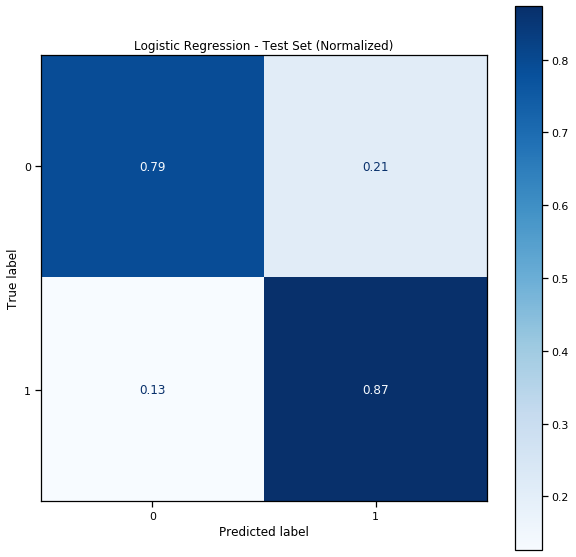

In [181]:
y_hat_nb_test = clf_nb.predict(X_test_numeric)
print(classification_report(y_test, y_hat_nb_test))
show_confusion_matrix(clf_nb, X_test_numeric, y_test, title='Naive Bayes - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='kneighbors'></a>
### K Nearest Neighbors

              precision    recall  f1-score   support

           0       0.85      0.89      0.87    103276
           1       0.88      0.84      0.86    103276

    accuracy                           0.86    206552
   macro avg       0.87      0.86      0.86    206552
weighted avg       0.87      0.86      0.86    206552



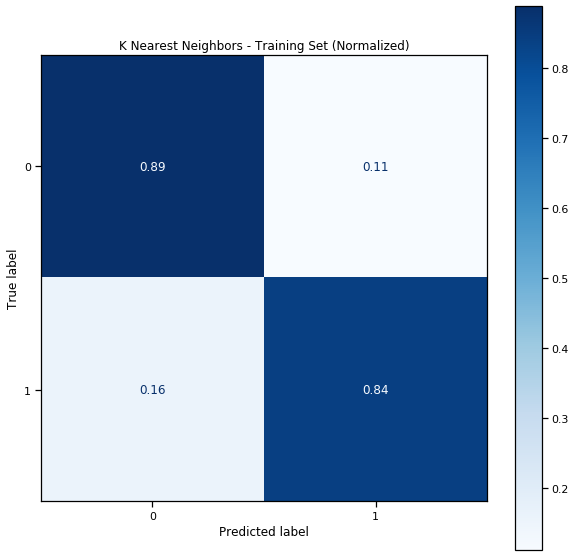

In [182]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_resampled, y_train_resampled)

y_hat_knn_train = clf_knn.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_knn_train))
show_confusion_matrix(clf_knn, X_train_resampled, y_train_resampled, title='K Nearest Neighbors - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.44      0.85      0.58     33858
           1       0.97      0.80      0.88    186414

    accuracy                           0.81    220272
   macro avg       0.71      0.83      0.73    220272
weighted avg       0.89      0.81      0.83    220272



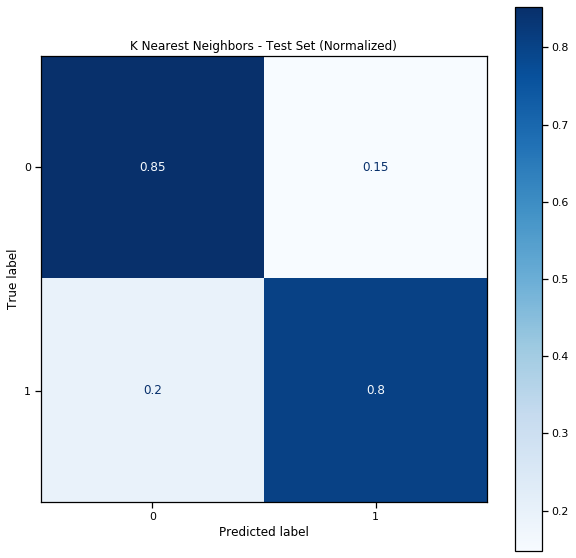

In [183]:
y_hat_knn_test = clf_knn.predict(X_test_numeric)
print(classification_report(y_test, y_hat_knn_test))
show_confusion_matrix(clf_knn, X_test_numeric, y_test, title='K Nearest Neighbors - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='#decisiontrees'></a>
### Decision Trees

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    103276
           1       0.98      0.94      0.96    103276

    accuracy                           0.96    206552
   macro avg       0.96      0.96      0.96    206552
weighted avg       0.96      0.96      0.96    206552



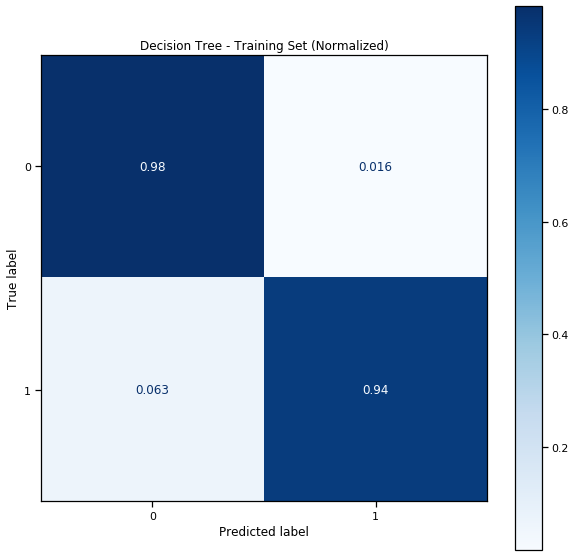

In [184]:
clf_dt = DecisionTreeClassifier(criterion='entropy')
clf_dt.fit(X_train_resampled, y_train_resampled)

y_hat_dt_train = clf_dt.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_dt_train))
show_confusion_matrix(clf_dt, X_train_resampled, y_train_resampled, title='Decision Tree - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.39      0.82      0.53     33858
           1       0.96      0.77      0.86    186414

    accuracy                           0.78    220272
   macro avg       0.68      0.79      0.69    220272
weighted avg       0.87      0.78      0.81    220272



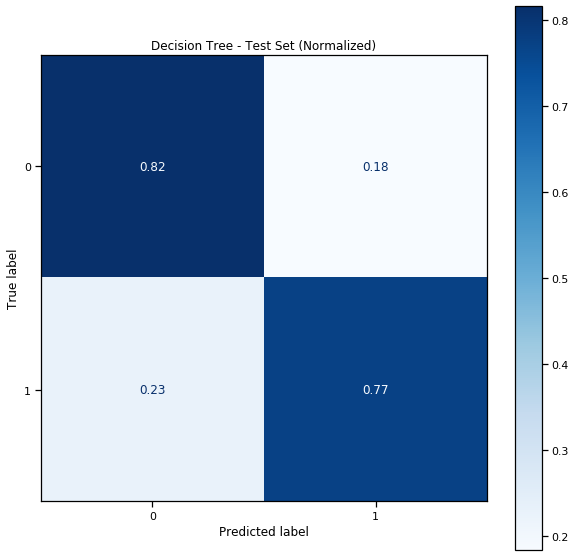

In [185]:
y_hat_dt_test = clf_dt.predict(X_test_numeric)
print(classification_report(y_test, y_hat_dt_test))
show_confusion_matrix(clf_dt, X_test_numeric, y_test, title='Decision Tree - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='#baggedtrees'></a>
### Bagged Trees

              precision    recall  f1-score   support

           0       0.83      0.87      0.85    103276
           1       0.87      0.82      0.84    103276

    accuracy                           0.84    206552
   macro avg       0.85      0.84      0.84    206552
weighted avg       0.85      0.84      0.84    206552



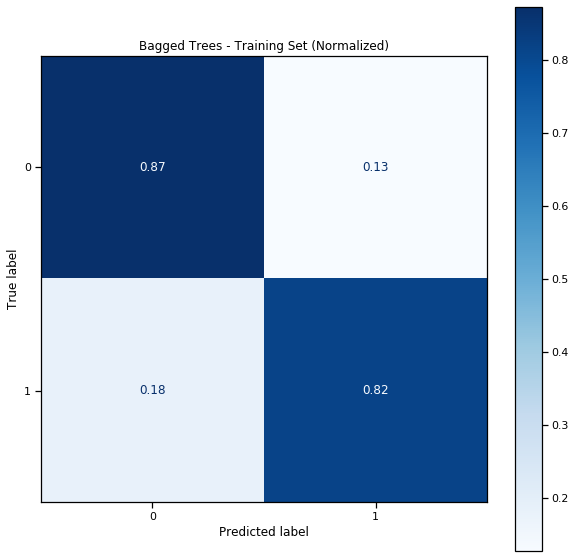

In [186]:
clf_bagged = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_leaf_nodes=100), 
                                 n_estimators=20)
clf_bagged.fit(X_train_resampled, y_train_resampled)

y_hat_bagged_train = clf_bagged.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_bagged_train))
show_confusion_matrix(clf_bagged, X_train_resampled, y_train_resampled, title='Bagged Trees - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.46      0.87      0.60     33858
           1       0.97      0.82      0.89    186414

    accuracy                           0.82    220272
   macro avg       0.72      0.84      0.75    220272
weighted avg       0.89      0.82      0.84    220272



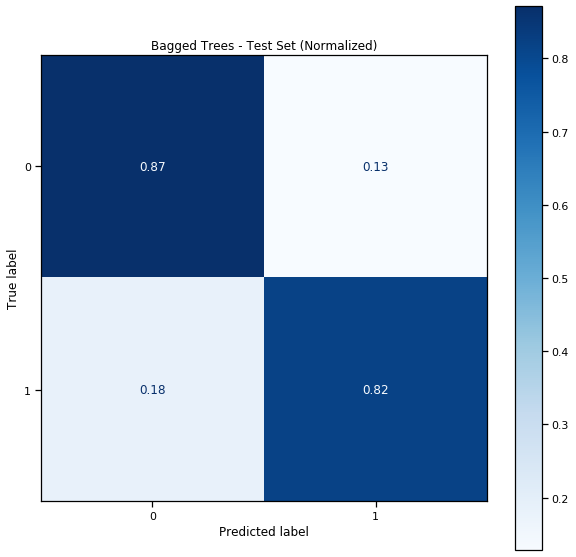

In [187]:
y_hat_bagged_test = clf_bagged.predict(X_test_numeric)
print(classification_report(y_test, y_hat_bagged_test))
show_confusion_matrix(clf_bagged, X_test_numeric, y_test, title='Bagged Trees - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='randomforest'></a>
### Random Forest

              precision    recall  f1-score   support

           0       0.86      0.91      0.88    103276
           1       0.90      0.86      0.88    103276

    accuracy                           0.88    206552
   macro avg       0.88      0.88      0.88    206552
weighted avg       0.88      0.88      0.88    206552



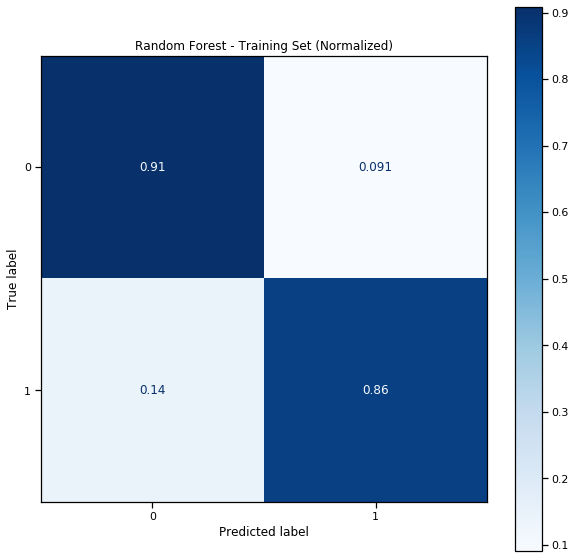

In [188]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth = 15)
clf_forest.fit(X_train_resampled, y_train_resampled)

y_hat_forest_train = clf_forest.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_forest_train))
show_confusion_matrix(clf_forest, X_train_resampled, y_train_resampled, title='Random Forest - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.46      0.87      0.60     33858
           1       0.97      0.82      0.89    186414

    accuracy                           0.82    220272
   macro avg       0.72      0.84      0.75    220272
weighted avg       0.89      0.82      0.84    220272



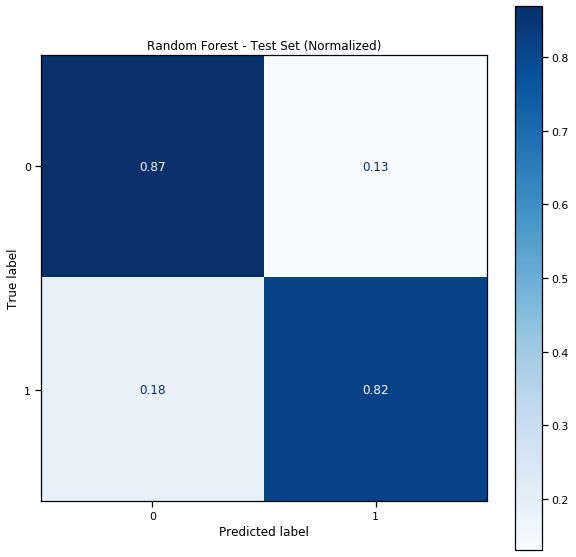

In [189]:
y_hat_forest_test = clf_forest.predict(X_test_numeric)
print(classification_report(y_test, y_hat_forest_test))
show_confusion_matrix(clf_forest, X_test_numeric, y_test, title='Random Forest - Test Set (Normalized)');

In [197]:
pickle.dump( clf_forest, open( "../models/save.forest", "wb" ) )



[Back to Top ↑](#top)

<a id='adaboost'></a>
### Adaboost

              precision    recall  f1-score   support

           0       0.83      0.86      0.84    103276
           1       0.85      0.82      0.84    103276

    accuracy                           0.84    206552
   macro avg       0.84      0.84      0.84    206552
weighted avg       0.84      0.84      0.84    206552



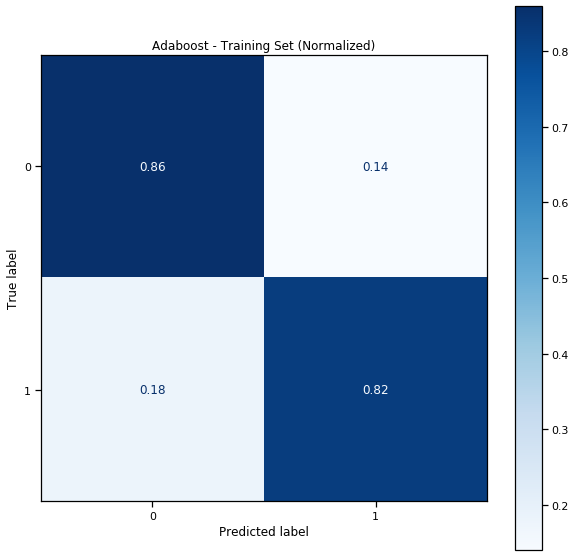

In [190]:
clf_ab = AdaBoostClassifier()
clf_ab.fit(X_train_resampled, y_train_resampled)

y_hat_ab_train = clf_ab.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_ab_train))
show_confusion_matrix(clf_ab, X_train_resampled, y_train_resampled, title='Adaboost - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.47      0.86      0.61     33858
           1       0.97      0.82      0.89    186414

    accuracy                           0.83    220272
   macro avg       0.72      0.84      0.75    220272
weighted avg       0.89      0.83      0.85    220272



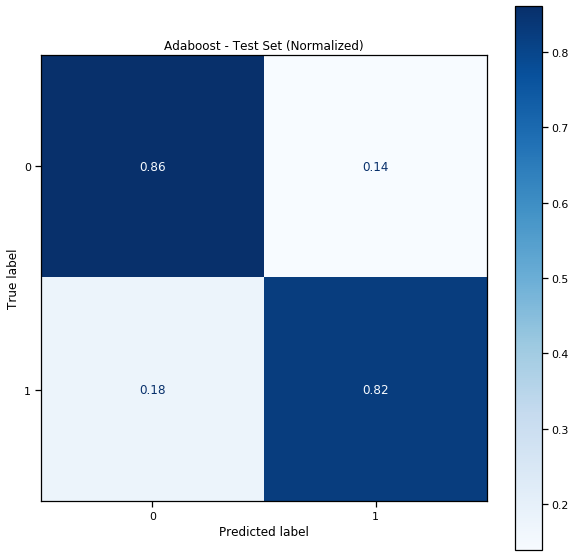

In [191]:
y_hat_ab_test = clf_ab.predict(X_test_numeric)
print(classification_report(y_test, y_hat_ab_test))
show_confusion_matrix(clf_ab, X_test_numeric, y_test, title='Adaboost - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='gradientboost'></a>
### Gradient Boost

              precision    recall  f1-score   support

           0       0.82      0.87      0.85    103276
           1       0.86      0.82      0.84    103276

    accuracy                           0.84    206552
   macro avg       0.84      0.84      0.84    206552
weighted avg       0.84      0.84      0.84    206552



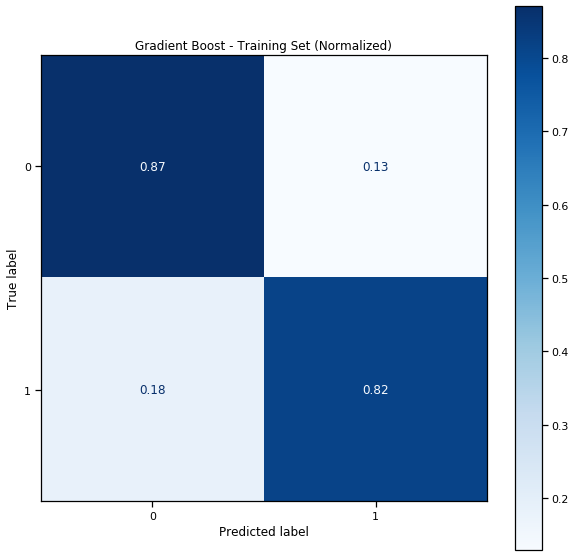

In [192]:
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train_resampled, y_train_resampled)

y_hat_gb_train = clf_gb.predict(X_train_resampled)

print(classification_report(y_train_resampled, y_hat_gb_train))
show_confusion_matrix(clf_gb, X_train_resampled, y_train_resampled, title='Gradient Boost - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.46      0.87      0.60     33858
           1       0.97      0.82      0.89    186414

    accuracy                           0.82    220272
   macro avg       0.72      0.84      0.75    220272
weighted avg       0.89      0.82      0.84    220272



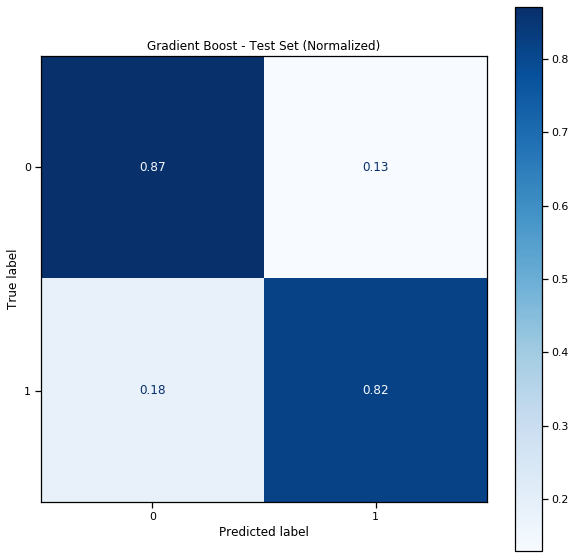

In [193]:
y_hat_gb_test = clf_gb.predict(X_test_numeric)
print(classification_report(y_test, y_hat_gb_test))
show_confusion_matrix(clf_gb, X_test_numeric, y_test, title='Gradient Boost - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='countvectorization'></a>
### Improved Results through Count Vectorization

In addition to our experiments with VADER, we also tried Count Vectorization, collecting the universal set of every word appearing in a review in our sample, and then transforming each review into a sparsely populated vector counting the number of times each word in the universal set occurs in that review so that we could use these vectors as predictors.

When run using a train-test split of all 960,000 reviews in our watches dataset, this method yielded better results in terms of generalizability, giving us 71% accuracy for Logistic Regression against both the training set and the test set. The downside was that it was incredibly slow and required a vast amount of memory, frequently forcing the kernel to restart before processing completed.

Results were not as strong when working with the much smaller 20,000-25,000 review random sample used for the rest of our analysis. Note the 20% score gap between training set and test set below, indicating a strong possibility of overfitting once again.

In [194]:
# X_train_vector, X_test_vector = get_vectorized_features(X_train, X_test)

In [196]:
# lr = LogisticRegression(penalty = 'l2')
# lr.fit(X_train_vector, y_train)

In [ ]:
lr.score(X_train_vector, y_train)

In [ ]:
lr.score(X_test_vector, y_test)

<a id='visualizations'></a>
### Visualizations

The visualizations below help to illustrate how the words and phrases in different classes of reviews differ from each other.

### Word Cloud for 5-Star Reviews

In [ ]:
n_star_review_wordcloud(df, 5)

### Word Cloud for 3-Star Reviews


In [ ]:
# n_star_review_wordcloud(df, 3)

### Word Cloud for 1-Star Reviews


In [ ]:
n_star_review_wordcloud(df, 1)


[Back to Top ↑](#top)

<a id='recommendations'></a>
### Recommendations & Next Steps

Through our analysis we've established the starting point for a framework by which the text of an Amazon review text can be used to predict the star rating associated with that review. Significant work remains in terms of improving the generalizability of these predictions so that they perform with a high degree of accuracy on new data outside of the training set. 

To accomplish this, we will continue to tune our models to find the optimal parameters and also seek to test additional models such as XGBoost, SVC, and Kernel Approximation. Given the promise shown by our Count Vectorization experiments, continuing to explore that method and other NLP techniques should be helpful in continuing to improve the performance of our models.

Further, we will seek to work with additional categories of data, and also explore the possibility of predicting only whether a review is "good" (4 or 5 stars) or "bad" (1 or 2 stars), which may be just as valuable or more valuable to a business as knowing the precise star rating.

Our eventual goal is that our process can be deployed on customer conversations anywhere, in any form, allowing businesses to proceed up with the appropriate automated customer service response (either internal to the business or directly to the customer), based on the class of the message and perhaps other contextual data that may provide further clues and insights.



[Back to Top ↑](#top)